In [1]:
# import sklearn for the dataset
from sklearn import datasets
# import pandas for dataset conversion
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
import numpy as np
# Unpack the feature matrix if it's a NumPy array
data = diabetes.data if isinstance(diabetes.data, np.ndarray) else diabetes.data.toarray()

df_dia = pd.DataFrame(data=data, columns=diabetes.feature_names)
df_dia['target'] = diabetes.target
df_dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
X = df_dia.iloc[:, :-1]
y = df_dia.iloc[:, -1:]

In [6]:
# import lib/package for training model
from sklearn.model_selection import train_test_split

In [7]:
# set up the train and test; set the test size to 20% and the remaining 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# check the dimension of training set
X_train.shape, y_train.shape

((353, 10), (353, 1))

In [9]:
# check the dimension of test set
X_test.shape, y_test.shape

((89, 10), (89, 1))

In [10]:
# lib/package for making the model
from sklearn import linear_model
# package that allow to compute the performance of the model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# define regression model
model = linear_model.LinearRegression()

In [12]:
# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# apply trained model to make prediction -- test set
y_pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Value')

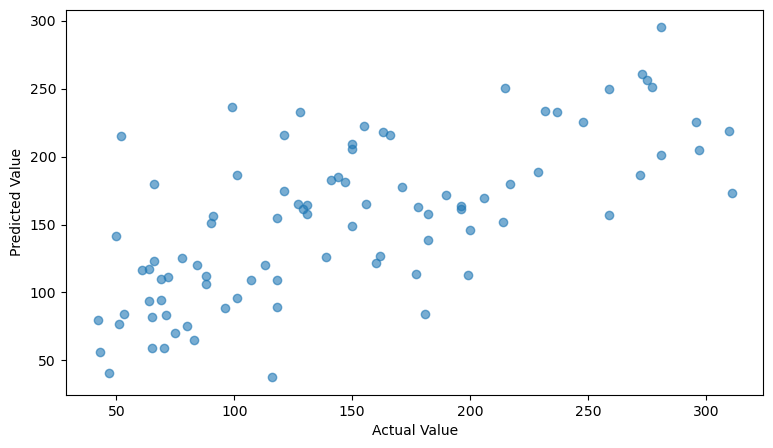

In [29]:
plt.figure(figsize=(9, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [15]:
# display the model's performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error (MSE): {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error (MSE): {:.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Coefficient of Determination (R^2): {:.4f}'.format(r2_score(y_test, y_pred)))

Coefficients: [[   13.93122591  -284.67507725   551.70675006   328.86422847
  -1035.48193876   648.68961525   193.81948575   214.12307716
    855.59204128    12.76359249]]
Intercept: [153.31438797]
Mean Squared Error (MSE): 3033.5201
Root Mean Squared Error (MSE): 55.0774
Coefficient of Determination (R^2): 0.4523


In [16]:
# low RMSE it means it is a good model